In [1]:
!pip install tensorflow opencv-python matplotlib transformers

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator




Model details: https://www.geeksforgeeks.org/efficientnet-architecture/

In [3]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download the data from the Kaggle
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces
!unzip -q 140k-real-and-fake-faces.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [00:38<00:00, 130MB/s]
100% 3.75G/3.75G [00:38<00:00, 103MB/s]


In [8]:
#Deal with the data
base_path = "/content/data/real_vs_fake/real-vs-fake/"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [9]:
print("Training real images: ", len(os.listdir(os.path.join(train_path, "real"))))
print("Training fake images: ", len(os.listdir(os.path.join(train_path, "fake"))))
print("Testing real images: ", len(os.listdir(os.path.join(test_path, "real"))))
print("Testing fake images: ", len(os.listdir(os.path.join(test_path, "fake"))))


Training real images:  50000
Training fake images:  50000
Testing real images:  10000
Testing fake images:  10000


In [10]:
#Selection of pre-trained model for deep fake detection
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
#Building the model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),

])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [12]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.


In [13]:
valid_gen = datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.


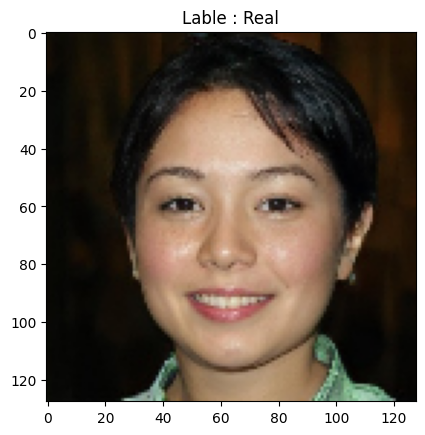

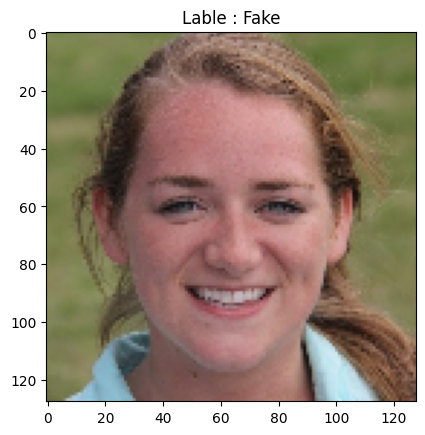

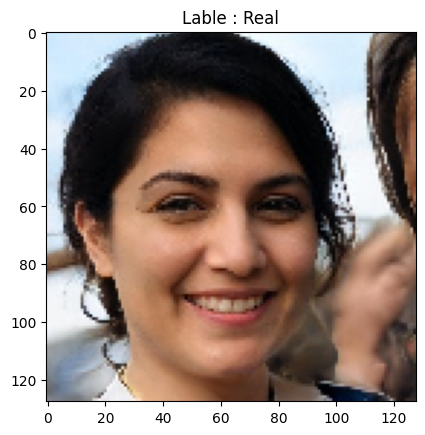

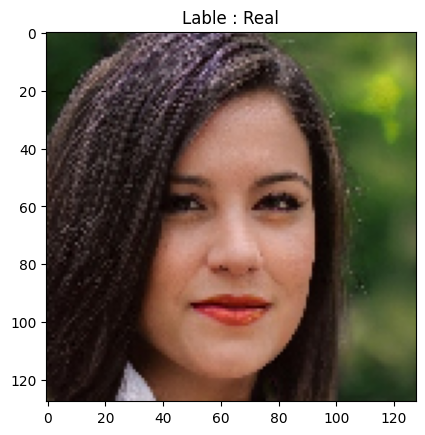

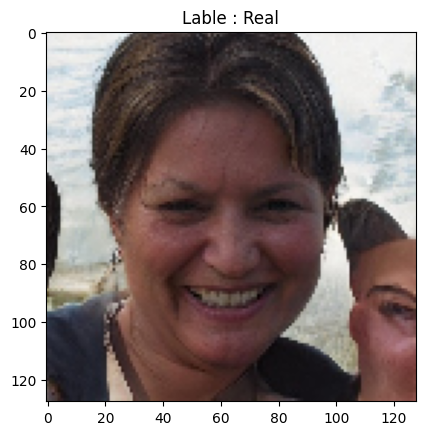

In [14]:
for images, labels in train_generator:
    for i in range(5):
      plt.imshow(images[i])
      plt.title(f"Lable : { 'Real' if labels[i]==0 else 'Fake'}")
      plt.show()

    break

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_gen,
    epochs=5,
    steps_per_epoch = train_generator.samples // 32,
    validation_steps = valid_gen.samples // 32
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3020s 962ms/step - accuracy: 0.5007 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3028s 969ms/step - accuracy: 0.4963 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2977s 953ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
